In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler, OrdinalEncoder


In [2]:
pip install synapseml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.7/584.7 kB 7.1 MB/s eta 0:00:00


In [3]:
from synapse.ml.core.platform import *
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import lightgbm
from sklearn.metrics import roc_auc_score

import matplotlib.pylab as plt

In [4]:
from google.colab import files
uploaded = files.upload()


Saving merge_data_final.xlsx to merge_data_final.xlsx


In [22]:
# Sau khi tải lên, bạn có thể đọc file Excel như sau:
import pandas as pd
df = pd.read_excel('merge_data_final.xlsx')
df.head()

,TienSuYKhoa,ChamNoi,CungNhac,CoLap,ChoiGiaVo,HanhViLapLai,KyNangGiaoTiepSom,ChoiLuanPhien,BatChuoc,SaiViec,PhanUngTenGoi,ChiTro,ChuYLienKet,TiepXucMat,TargetBinary
0,0,1,0,1,0,0,1,1,0,1,0,0,1,1,1
1,0,1,0,1,0,1,1,0,0,1,0,1,1,1,1
2,0,1,0,0,1,0,1,0,0,0,1,1,1,1,1
3,0,0,0,0,1,1,1,0,1,0,1,1,1,1,1
4,0,1,0,0,1,0,1,0,1,0,1,1,1,1,1


In [ ]:
# Liệt kê tên các cột
print(df.columns.tolist())
rows, cols = df.shape
print(f"Số hàng: {rows}, Số cột: {cols}")

['TienSuYKhoa', 'ChamNoi', 'CungNhac', 'CoLap', 'ChoiGiaVo', 'HanhViLapLai', 'KyNangGiaoTiepSom', 'ChoiLuanPhien', 'BatChuoc', 'SaiViec', 'PhanUngTenGoi', 'ChiTro', 'ChuYLienKet', 'TiepXucMat', 'TargetBinary']
Số hàng: 817, Số cột: 15


In [ ]:
for i, col in enumerate(df.columns):
    print(f"Vị trí {i}: {col}")

Vị trí 0: TienSuYKhoa
Vị trí 1: ChamNoi
Vị trí 2: CungNhac
Vị trí 3: CoLap
Vị trí 4: ChoiGiaVo
Vị trí 5: HanhViLapLai
Vị trí 6: KyNangGiaoTiepSom
Vị trí 7: ChoiLuanPhien
Vị trí 8: BatChuoc
Vị trí 9: SaiViec
Vị trí 10: PhanUngTenGoi
Vị trí 11: ChiTro
Vị trí 12: ChuYLienKet
Vị trí 13: TiepXucMat
Vị trí 14: TargetBinary


In [23]:
X = df.iloc[:, 0:14]      # lấy từ cột 0 đến 13 (14 đặc trưng)
y = df.iloc[:, 14]        # lấy cột TargetBinary (vị trí 14)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    shuffle=True,      # Có thể bỏ vì mặc định đã là True
    stratify=y         # Rất quan trọng trong bài toán classification
)

print(f"Kích thước tập train: {len(X_train)} dòng")
print(f"Kích thước tập test: {len(X_test)} dòng")

Kích thước tập train: 653 dòng
Kích thước tập test: 164 dòng


# TRAINING  & EVALUATE MODEL

In [25]:
train_data = lightgbm.Dataset(X_train, label=y_train)
test_data = lightgbm.Dataset(X_test, label=y_test)

In [9]:
pip install -U lightgbm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 32.0 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.5.0
    Uninstalling lightgbm-4.5.0:
      Successfully uninstalled lightgbm-4.5.0


In [26]:
# KHÔNG CHẠY LẠI
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

# 1. Khởi tạo mô hình
lgbm = LGBMClassifier(objective='binary', random_state=42)

# 2. Thiết lập lưới tham số
param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 7, 12],
    'num_leaves': [15, 31, 63],
    'min_child_samples': [10, 20],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0],
    'reg_alpha': [0, 0.5],
    'reg_lambda': [0, 0.5],
    'class_weight': [None, 'balanced']
}

# 3. Thiết lập GridSearchCV
grid = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# 4. Huấn luyện tìm tham số tốt nhất
grid.fit(X, y)

# 5. In kết quả
print("Best parameters found:")
print(grid.best_params_)



Fitting 5 folds for each of 3456 candidates, totalling 17280 fits


KeyboardInterrupt: 

In [27]:
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 1. Chia lại tập train thành train/valid để dùng early stopping
X_train_final, X_valid, y_train_final, y_valid = train_test_split(
    X_train, y_train, test_size=0.125, random_state=42, stratify=y_train
)

# 2. Khởi tạo model với tham số tốt nhất
model = LGBMClassifier(
    objective='multiclass',
    num_class=9,
    learning_rate=0.03,
    num_leaves=15,
    max_depth=4,
    n_estimators=500,
    min_child_samples=20,
    subsample=0.08,
    colsample_bytree=0.9,
    reg_alpha=0.01,
    reg_lambda=0.1,
    class_weight='balanced',
    random_state=42,
    verbose=-1
)

# 3. Huấn luyện với early stopping
model.fit(
    X_train_final, y_train_final,
    eval_set=[(X_valid, y_valid)],
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(period=50)
    ]
)


Training until validation scores don't improve for 50 rounds
[50]	valid_0's multi_logloss: 0.403192
[100]	valid_0's multi_logloss: 0.353503
[150]	valid_0's multi_logloss: 0.332896
[200]	valid_0's multi_logloss: 0.329137
Early stopping, best iteration is:
[187]	valid_0's multi_logloss: 0.32407


LGBMClassifier(class_weight='balanced', colsample_bytree=0.9,
               learning_rate=0.03, max_depth=4, n_estimators=500, num_class=9,
               num_leaves=15, objective='multiclass', random_state=42,
               reg_alpha=0.01, reg_lambda=0.1, subsample=0.08, verbose=-1)

In [28]:
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix
import pandas as pd

# 1. Dự đoán nhãn và xác suất
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # xác suất lớp 1 (nếu là binary classification)

# 2. Tính các độ đo
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# 3. Tạo bảng kết quả
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-score', 'ROC-AUC'],
    'Score': [precision, recall, f1, roc_auc]
})
metrics_df['Score'] = metrics_df['Score'].round(3)

# 4. Hiển thị bảng độ đo
print("=== Evaluation Metrics (Chạy đơn) ===")
print(metrics_df)


=== Evaluation Metrics (Chạy đơn) ===
      Metric  Score
0  Precision  0.953
1     Recall  0.856
2   F1-score  0.902
3    ROC-AUC  0.937


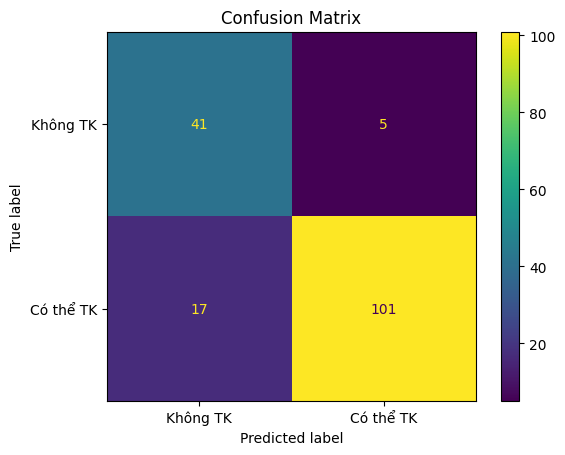

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Không TK', 'Có thể TK'])
plt.title("Confusion Matrix")
plt.show()


# Cross-Validation

In [30]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score
import pandas as pd
import numpy as np

# 1. Thiết lập Stratified K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 2. Lưu các độ đo
recall_scores = []
precision_scores = []
f1_scores = []
roc_auc_scores = []

# 3. Lặp qua từng fold
for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train_fold, y_train_fold)
    y_pred_fold = model.predict(X_test_fold)
    y_proba_fold = model.predict_proba(X_test_fold)[:, 1]  # xác suất lớp 1

    recall_scores.append(recall_score(y_test_fold, y_pred_fold))
    precision_scores.append(precision_score(y_test_fold, y_pred_fold))
    f1_scores.append(f1_score(y_test_fold, y_pred_fold))
    roc_auc_scores.append(roc_auc_score(y_test_fold, y_proba_fold))

# 4. Tạo bảng kết quả
results_df = pd.DataFrame({
    "Metric": ["Recall", "Precision", "F1-score", "ROC-AUC"],
    "Mean": [
        np.mean(recall_scores),
        np.mean(precision_scores),
        np.mean(f1_scores),
        np.mean(roc_auc_scores)
    ],
    "Std": [
        np.std(recall_scores),
        np.std(precision_scores),
        np.std(f1_scores),
        np.std(roc_auc_scores)
    ]
})

# 5. Làm tròn 3 chữ số
results_df["Mean"] = results_df["Mean"].round(3)
results_df["Std"] = results_df["Std"].round(3)

# 6. In kết quả
print("=== Cross-Validation Classification Metrics (Stratified 5-Fold) ===")
print(results_df)


=== Cross-Validation Classification Metrics (Stratified 5-Fold) ===
      Metric   Mean    Std
0     Recall  0.866  0.028
1  Precision  0.915  0.025
2   F1-score  0.889  0.010
3    ROC-AUC  0.908  0.010


# KẾT LUẬN